## Breast cancer exercise: Predict malignant with XGBoost/Ada Boost


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as skms
import xgboost as xgb

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
raw_data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/data-breast-cancer.csv')
raw_data = pd.DataFrame(raw_data)
raw_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data = raw_data.drop(columns = ['id','Unnamed: 32'])

#### Explore features

In [62]:
# drop some features
data_clean = data.drop(columns = features_to_drop)


In [63]:
# get correlations, binary/object will be disregarded 
corr_values = data_clean.corr()
# get col names
feature_names = list(corr_values)


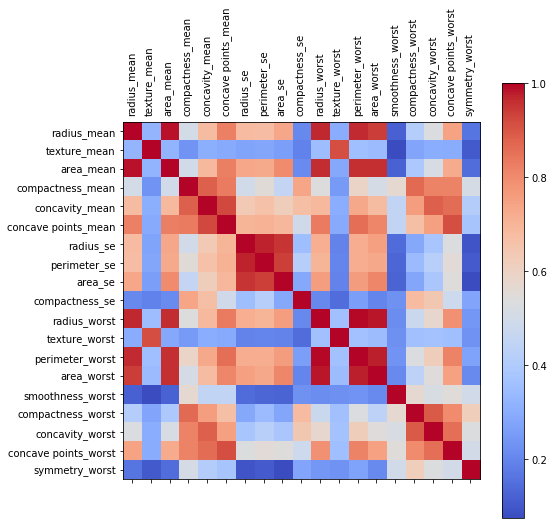

In [64]:
# plot heat map
plt.imshow(corr_values, cmap = 'coolwarm') # interpolation = 'nearest'
plt.tick_params(labeltop = 1, labelbottom = 0)
plt.xticks(range(len(feature_names)), feature_names, rotation = 90)
plt.yticks(range(len(feature_names)), feature_names)
plt.colorbar()
None

In [22]:
data_clean = data_clean.drop(columns = ['radius_mean','texture_worst','perimeter_se','radius_se','perimeter_worst','radius_worst'])


#### split data into train and test

In [23]:
data_pred = data_clean.drop(columns = ['diagnosis'])
y = data_clean['diagnosis']

# data_pred = data.drop(columns = ['diagnosis'])
# y = data['diagnosis']

In [24]:
X_train, X_test, y_train, y_test = skms.train_test_split(data_pred, y, test_size = 0.2)

In [25]:
# check for balanced output
y_train.value_counts()

B    283
M    172
Name: diagnosis, dtype: int64

#### Select features?

In [ ]:
# SelectKBest
# X_train_select = SelectKBest(score_func = f_classif, k = 5).fit_transform(X_train, y_train)

### AdaBoost

do exactly like XGBoost

In [ ]:
# AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, 
#        algorithm=’SAMME.R’, random_state=None)

# base_estimator=None, default is DecisionTreeClassifier(max_depth=1)
# n_estimators: how many rounds it will try to improve, stops earlier when achieved perfect model. lol

# ada_boost = AdaBoostClassifier(n_estimators = 100).fit(X_train, y_train)


### XGBoost

#### Hyper parameter tuning: Random Search

In [ ]:
parameters_init = {'n_estimators': list(range(100, 500, 20)), 'max_depth': list(range(4, 30, 2)),
                 'subsample': [0.3,0.4,0.5,0.6,0.7,0.8] }


In [ ]:
# to collect results in dictionary:
dictkeys = list(parameters_init.keys())   # get parameter names
empty_list = [[] for x in range(len(dictkeys))]  # create list of empty lists
result_dict = dict(zip(dictkeys,empty_list)) # merge to dict


xg_boost = xgb.XGBClassifier(objective='binary:logistic')

number_rand_tries = 20

for i in range(number_rand_tries):
    
    myRS = skms.RandomizedSearchCV(estimator = xg_boost, param_distributions = parameters_init, 
                               scoring = 'roc_auc', cv = 3, n_iter = 20,
                               n_jobs = -1, verbose = 1).fit(X_train, y_train)
    # get best params of n_iter tries
    curr_params_RandS = myRS.best_params_
    
    # append best params to dict
    for key in dictkeys:
        result_dict[key].append(curr_params_RandS[key])

In [ ]:
plt.hist(result_dict['subsample'])
None

In [ ]:
result_dict['subsample']

In [8]:
parameters_better = {'n_estimators': list(range(100, 200, 20)), 'max_depth': [4,5,6],
                 'subsample': [0.6] }

#### Hyper parameter tuning: Grid Search

In [27]:
# continue with GridSearch
xg_boost = xgb.XGBClassifier(objective='binary:logistic')

myGS = skms.GridSearchCV(estimator = xg_boost, scoring = 'roc_auc', param_grid = parameters_better, 
                         cv = 3, n_jobs = -1, verbose = 1).fit(X_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.0s finished


In [29]:
print(myGS.best_params_)
print('---------------------------------')
best_model = myGS.best_estimator_
print(best_model)

{'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}
---------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.6)


#### Cross val

In [30]:
mean_roc_auc_xgb = np.mean(skms.cross_val_score(best_model, X_train, y_train, cv = 6, scoring = 'roc_auc'))

print('ROC_AUC score of XGBoost model = %.6f. ' % mean_roc_auc_xgb)

ROC_AUC score of XGBoost model = 0.992735. 


#### Explore feature importance

In [31]:
# get feature importance
feature_imp_xgb = best_model.feature_importances_
feature_names = list(X_train)

In [32]:
# top 3
feature_imp_df = pd.DataFrame({'Feature names':feature_names, 'Feature importance': feature_imp_xgb}).sort_values('Feature importance', ascending = False)
feature_imp_df.head(3)


,Feature names,Feature importance
4,concave points_mean,0.295500
11,concave points_worst,0.290049
7,area_worst,0.117980


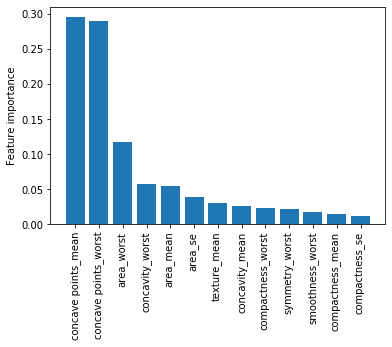

In [33]:
# plot feature imp
plt.bar(feature_imp_df['Feature names'], feature_imp_df['Feature importance'])
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
None

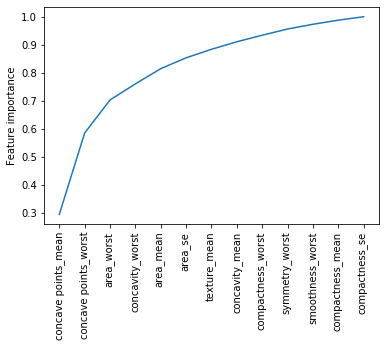

In [34]:
feature_agg_imp = np.cumsum(feature_imp_df['Feature importance'])

plt.plot(feature_imp_df['Feature names'],feature_agg_imp)
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
None

In [18]:
drop_feature_ix = feature_agg_imp > 0.95
features_to_drop = list(feature_imp_df['Feature names'][drop_feature_ix])
features_to_drop

['smoothness_mean',
 'texture_se',
 'fractal_dimension_se',
 'smoothness_se',
 'symmetry_mean',
 'symmetry_se',
 'concave points_se',
 'concavity_se',
 'fractal_dimension_worst',
 'fractal_dimension_mean',
 'perimeter_mean']

### Final prediction

In [35]:
predicted_y = best_model.predict(X_test).tolist()

compare_df = pd.DataFrame(columns = ['True_y'], data = y_test.tolist() )
compare_df['Predicted_y'] = predicted_y
compare_df.head(5)

,True_y,Predicted_y
0,B,B
1,B,B
2,B,B
3,M,M
4,M,M


#### Confusion matrix

In [41]:
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predicted_y))
df_confusion_matrix

,0,1
0,71,3
1,2,38


In [59]:
# calculate true pos and false pos rate
predicted_prob_y = best_model.predict_proba(X_test)
# create binary
compare_df['True_y_binary'] = 0
compare_df.True_y_binary[compare_df['True_y'] == 'M'] = 1

fpr_test, tpr_test, _ = roc_curve(compare_df.True_y_binary, predicted_prob_y[:,1])

roc_df_test = pd.DataFrame({'fpr':fpr_test, 'tpr':tpr_test})


/Users/iMotz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


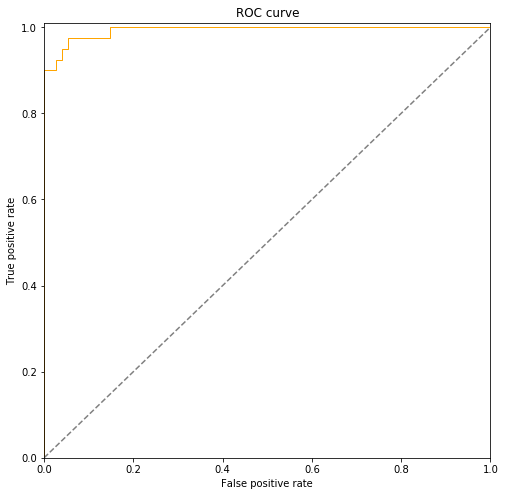

In [66]:
# plot ROC curve
plt.plot(fpr_test, tpr_test, 'orange', linewidth=1)
plt.plot([0, 1], [0, 1],'grey', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.title('ROC curve')
None